In [1]:
# Tensorflow 사용 버전 설정
%tensorflow_version 2.x

TensorFlow 2.x selected.


**1. 로컬 PC에 저장된 CSV 파일을 Google Colab으로 upload**

In [3]:
from google.colab import files

uploaded = files.upload()

Saving Iris.csv to Iris.csv


**2. CSV 파일을 읽고 데이터 프레임 생성**

In [100]:
import pandas as pd

df = pd.read_csv('./Iris.csv')

print(df.shape)
print(df)

(150, 6)
      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


**3. 데이터 전처리**

In [101]:
# 1) ID 컬럼 삭제
df = df.iloc[:, 1:6]
print(df)

# 2) pasndas.DataFrame -> numpy.ndarray로 변환
dataset = df.to_numpy()
print(type(dataset), dataset.shape)

# 3) 데이터(SL, SW, PL, PW)와 레이블(품종)을 분리
X = dataset[:, :-1].astype('float16')
Y = dataset[:, -1]
print(f'X: {X.shape}, Y: {Y.shape}')
print(X[:5])
print(Y[:5])

# 4) encoding 
# 레이블 데이터 타입을 문자열(setosa, versicolor, virginica)에서 숫자(0, 1, 2)로 변환
encoder = LabelEncoder()  # sklearn.preprocessing
encoder.fit(Y)
Y = encoder.transform(Y)
print(Y[:5])

# one-hot-encoding
Y = to_categorical(Y, 3, dtype='float16')  # tensorflow.keras.utils
print(Y[:5])

# 5) 학습 데이터 셋 / 테스트 데이터 셋 분할
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print(f'X_train: {X_train.shape}, Y_train: {Y_train.shape}')
print(f'X_test: {X_test.shape}, Y_test: {Y_test.shape}')
print(X_train[:5])
print(Y_train[:5])

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]
<class 'numpy.ndarray'> (150, 5)
X: (150

**4. 신경망 모델 생성**

In [0]:
# 클래스와 모듈 import
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# hidden_layer Dense(16, relu) -> output_layer Dense(3, softmax)
model = Sequential()

model.add(Dense(16, activation='relu', input_dim=4))

model.add(Dense(3, activation='softmax'))

**5. 신경망 학습**

In [103]:
# 신경망 모델 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# 일정 횟수동안 학습의 성과가 없으면 자동으로 stop
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=10)

# 신경망 모델 학습 진행(fit)
history = model.fit(X_train, Y_train, batch_size=1, epochs=50,
          validation_data=(X_test, Y_test))

Train on 105 samples, validate on 45 samples
Epoch 1/50
105/105 [==============================] - 1s 6ms/sample - loss: 2.1501 - accuracy: 0.3048 - val_loss: 1.0932 - val_accuracy: 0.4000
Epoch 2/50
105/105 [==============================] - 0s 3ms/sample - loss: 0.7736 - accuracy: 0.6762 - val_loss: 0.6730 - val_accuracy: 0.7111
Epoch 3/50
105/105 [==============================] - 0s 3ms/sample - loss: 0.6008 - accuracy: 0.7714 - val_loss: 0.6375 - val_accuracy: 0.7556
Epoch 4/50
105/105 [==============================] - 0s 3ms/sample - loss: 0.5495 - accuracy: 0.9333 - val_loss: 0.5921 - val_accuracy: 0.6889
Epoch 5/50
105/105 [==============================] - 0s 3ms/sample - loss: 0.5125 - accuracy: 0.8190 - val_loss: 0.5477 - val_accuracy: 0.8667
Epoch 6/50
105/105 [==============================] - 0s 3ms/sample - loss: 0.4637 - accuracy: 0.8857 - val_loss: 0.5220 - val_accuracy: 0.8222
Epoch 7/50
105/105 [==============================] - 0s 3ms/sample - loss: 0.4474 - accura

**6. 테스트 데이터로 평가**

In [104]:
eval = model.evaluate(X_test, Y_test)
print(f'X_test Loss: {eval[0]}, X_test Accuracy: {eval[1]}')

45/45 [==============================] - 0s 2ms/sample - loss: 0.2065 - accuracy: 0.9333
X_test Loss: 0.2065234621365865, X_test Accuracy: 0.9333333373069763


**7. Loss / Accuracy 그래프로 모델 성능 시각화**

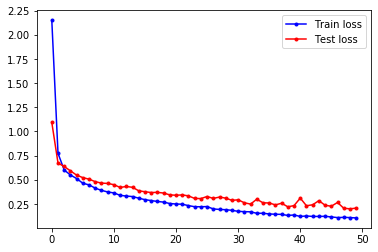

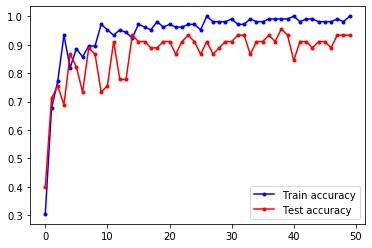

In [105]:
# Loss/Accuracy vs Epoch plot
x = range(50)  # epoch
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(x, train_loss, c='blue', marker='.', label='Train loss')
plt.plot(x, test_loss, c='red', marker='.', label='Test loss')
plt.legend()
plt.show()

train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(x, train_acc, c='blue', marker='.', label='Train accuracy')
plt.plot(x, test_acc, c='red', marker='.', label='Test accuracy')
plt.legend()
plt.show()

**8. confusion matrix & classification report**

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = np.argmax(Y_test, axis=1)
print(y_true)

y_pred = np.argmax(model.predict(X_test), axis=1)
print(y_pred)

cm = confusion_matrix(y_true, y_pred)
print(cm)

report = classification_report(y_true, y_pred)
print(report)

[2 1 2 0 2 2 1 1 2 1 2 0 2 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 2 2 2 1 1 1 2 1
 0 2 2 1 2 2 2 1]
[2 1 2 0 2 2 1 2 2 1 2 0 2 0 1 1 1 1 0 1 0 0 0 0 0 0 1 2 1 2 2 2 1 1 1 2 2
 0 2 2 1 2 2 2 1]
[[11  0  0]
 [ 0 15  3]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        18
           2       0.84      1.00      0.91        16

    accuracy                           0.93        45
   macro avg       0.95      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45

